<a href="https://colab.research.google.com/github/SimplyYasH19/Machine-Learning-Projects/blob/main/Daily_Births_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet --quiet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings

In [4]:
# 1. Load and prepare the data
df = pd.read_csv("daily-total-female-births.csv", parse_dates=['Date'])
df.rename(columns={'Date': 'ds', df.columns[1]: 'y'}, inplace=True)


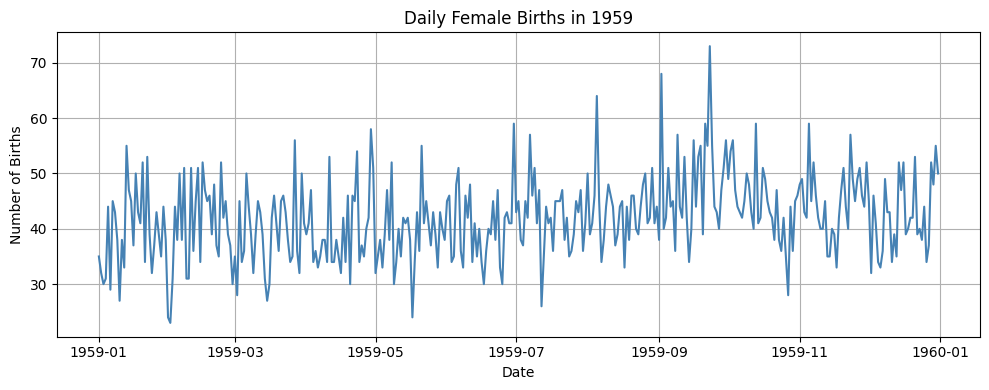

In [5]:
# 2. Exploratory visualization
plt.figure(figsize=(10,4))
plt.plot(df['ds'], df['y'], color='steelblue')
plt.title('Daily Female Births in 1959')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# 3. Prophet modeling (with warnings suppressed for clarity)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    m = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,      # Enable weekly seasonality for daily data
        daily_seasonality=False,
        changepoint_range=0.9,
        changepoint_prior_scale=0.5,
        seasonality_mode='multiplicative'
    )
    m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yh4hvvh/e9loiqc3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8yh4hvvh/qv_2hi6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91668', 'data', 'file=/tmp/tmp8yh4hvvh/e9loiqc3.json', 'init=/tmp/tmp8yh4hvvh/qv_2hi6w.json', 'output', 'file=/tmp/tmp8yh4hvvh/prophet_modelbifyshuk/prophet_model-20250812151327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:13:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:13:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
# 4. Forecasting
future = m.make_future_dataframe(periods=50, freq='D')  # Next 50 days
forecast = m.predict(future)

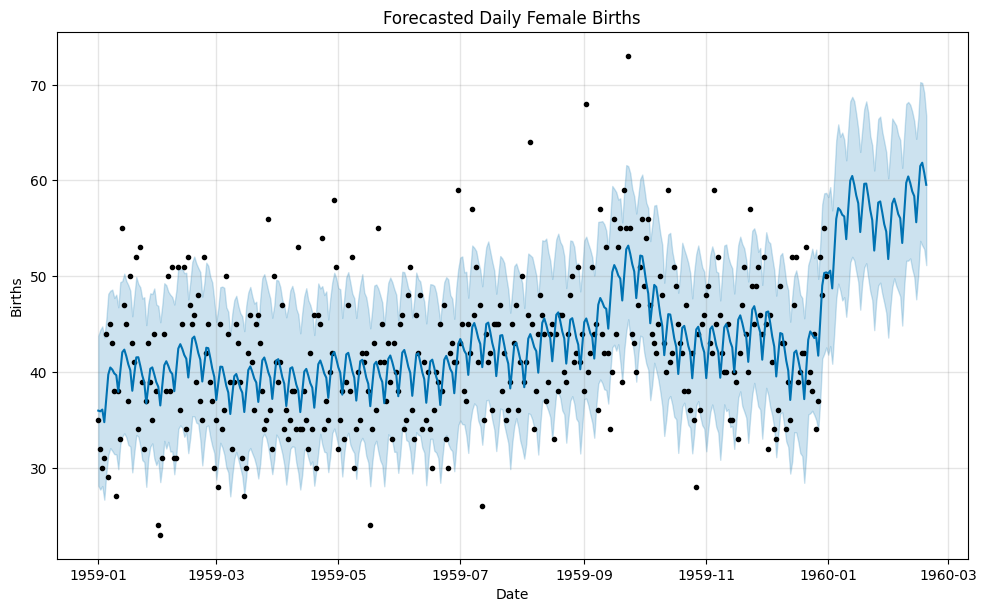

In [8]:
# 5. Forecast plot
fig1 = m.plot(forecast)
plt.title('Forecasted Daily Female Births')
plt.xlabel('Date')
plt.ylabel('Births')
plt.grid(True)
plt.show()

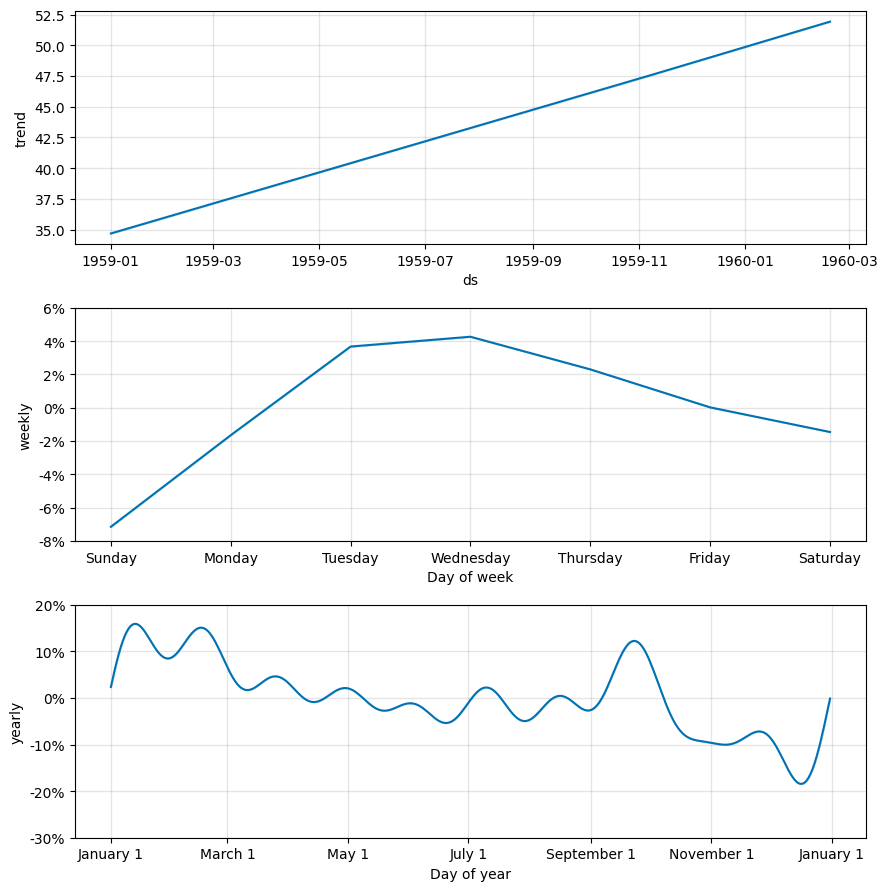

In [9]:
# 6. Components plot
fig2 = m.plot_components(forecast)
plt.show()

In [10]:
# 7. Inspect forecast dataframe
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))        # ds = date stamp column representing the date
                                                                              # yhat = This is the predicted (forecasted) value of the target variable for the given date in ds

,ds,yhat,yhat_lower,yhat_upper
405,1960-02-10,60.416884,51.625945,68.197721
406,1960-02-11,59.738862,51.856948,67.911036
407,1960-02-12,58.863259,50.756614,67.202287
408,1960-02-13,58.360909,49.944901,66.207967
409,1960-02-14,55.632572,47.585527,64.346839
410,1960-02-15,58.640000,50.083113,66.445704
411,1960-02-16,61.501674,53.686348,70.270311
412,1960-02-17,61.851074,53.218911,70.179346
413,1960-02-18,60.813743,52.833254,69.161772
414,1960-02-19,59.543112,51.154700,66.764379
